In [5]:
import pandas as pd

df = pd.read_csv("D:\Greaduation Project\data\Stroke_Data.csv")


Load Data 

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93400 entries, 0 to 93399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 93400 non-null  int64  
 1   gender             93400 non-null  object 
 2   age                93400 non-null  float64
 3   hypertension       93400 non-null  int64  
 4   heart_disease      93400 non-null  int64  
 5   ever_married       93400 non-null  object 
 6   work_type          93400 non-null  object 
 7   Residence_type     93400 non-null  object 
 8   avg_glucose_level  93400 non-null  float64
 9   bmi                89438 non-null  float64
 10  smoking_status     80108 non-null  object 
 11  stroke             93400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 8.6+ MB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,93400.000000,93400.000000,93400.000000,93400.000000,93400.000000,89438.000000,93400.000000
mean,30263.164647,48.536485,0.124433,0.077034,134.183854,28.039465,0.034368
std,18701.944430,22.407882,0.330076,0.266647,55.414630,7.500025,0.182174
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,14564.750000,31.000000,0.000000,0.000000,87.310000,22.300000,0.000000
50%,29216.500000,49.000000,0.000000,0.000000,116.180000,27.700000,0.000000
75%,43872.000000,66.600000,0.000000,0.000000,181.322500,33.400000,0.000000
max,72943.000000,90.000000,1.000000,1.000000,291.050000,97.600000,1.000000


Missing Values

In [9]:
df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   3962
smoking_status       13292
stroke                   0
dtype: int64

In [10]:
df["bmi"].fillna(df["bmi"].median(), inplace=True)
df["smoking_status"].fillna("Unknown", inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13664\373969354.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bmi"].fillna(df["bmi"].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13664\373969354.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [11]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df.drop_duplicates(inplace=True) 
df = df.drop("id", axis=1)

outliers

In [13]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [14]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(col, len(outliers))

age 0
hypertension 11622
heart_disease 7195
avg_glucose_level 0
bmi 685
stroke 3210


تجاهل Outliers في:

hypertension

heart_disease

stroke
عشان دول اعمدة binary

In [15]:
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df[(df[col] < lower) | (df[col] > upper)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
81,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.7,never smoked,1
141,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
257,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
264,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
93366,Female,41.5,0,0,Yes,Private,Rural,198.22,33.9,smokes,1
93372,Female,64.8,0,0,No,Children,Rural,111.70,37.3,formerly smoked,1
93377,Male,71.3,1,0,Yes,Govt_job,Rural,103.69,19.8,never smoked,1
93380,Male,46.9,1,0,Yes,Self-employed,Urban,198.74,21.0,never smoked,1


In [16]:
# bmi capping
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df["bmi"] = df["bmi"].clip(lower, upper)

EDA


In [17]:
#Target Distribution
df["stroke"].value_counts(normalize=True)

stroke
0    0.965632
1    0.034368
Name: proportion, dtype: float64

<Axes: xlabel='stroke', ylabel='age'>

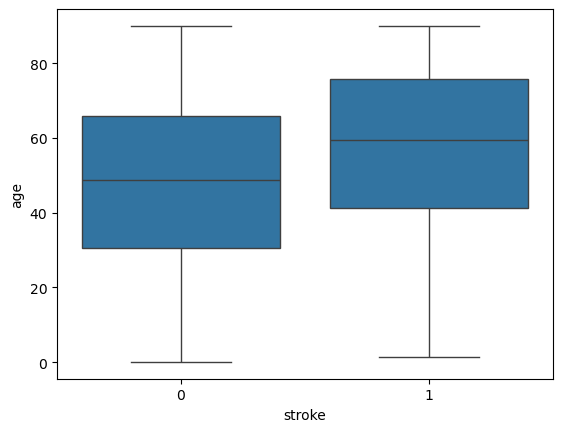

In [18]:
import seaborn as sns
sns.boxplot(x="stroke", y="age", data=df)

<Axes: xlabel='stroke', ylabel='bmi'>

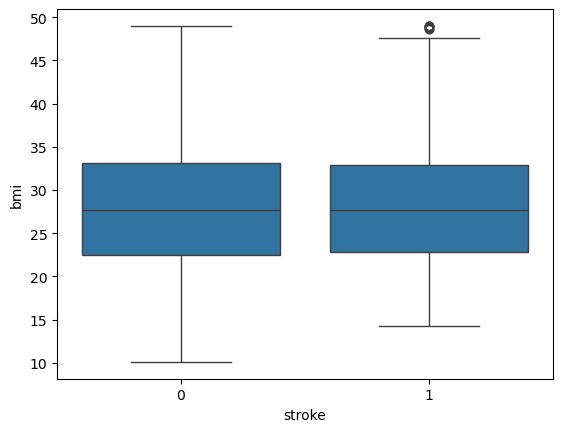

In [19]:
sns.boxplot(x="stroke", y="bmi", data=df)

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

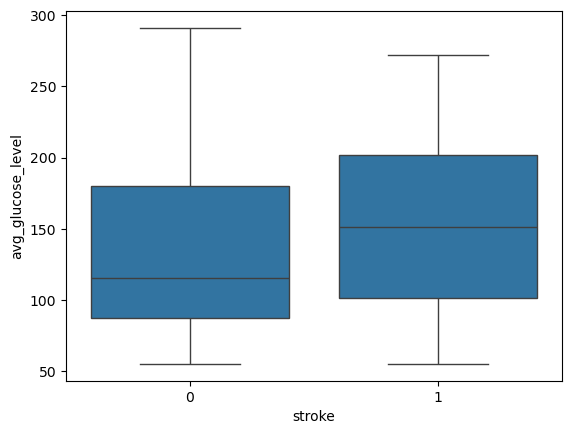

In [20]:
sns.boxplot(x="stroke", y="avg_glucose_level", data=df)

<Axes: xlabel='hypertension', ylabel='count'>

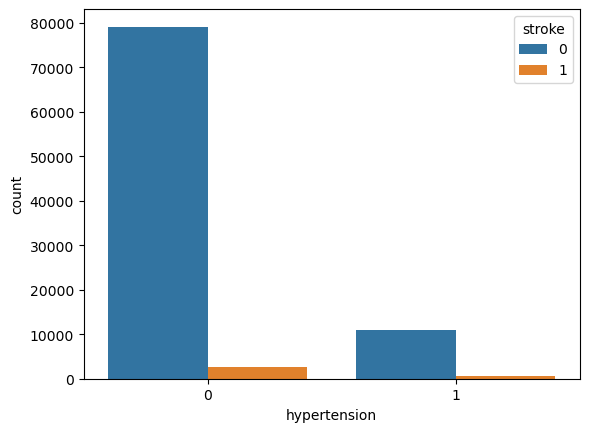

In [21]:
sns.countplot(x="hypertension", hue="stroke", data=df)

In [22]:
pd.crosstab(df["hypertension"], df["stroke"], normalize="index")

stroke,0,1
hypertension,,
0,0.967766,0.032234
1,0.950611,0.049389


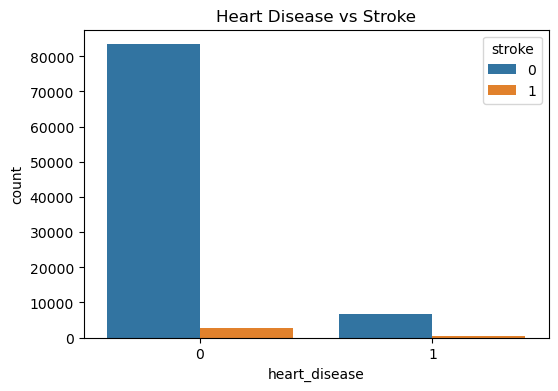

stroke,0,1
heart_disease,,
0,0.967832,0.032168
1,0.939263,0.060737


In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(x="heart_disease", hue="stroke", data=df)
plt.title("Heart Disease vs Stroke")
plt.show()

pd.crosstab(df["heart_disease"], df["stroke"], normalize="index")

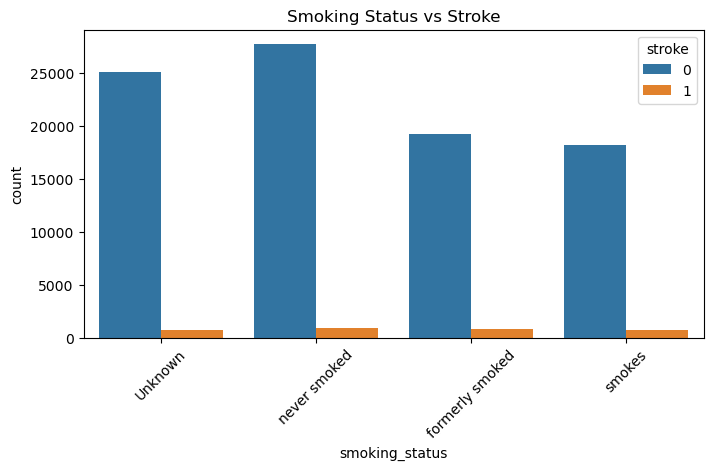

stroke,0,1
smoking_status,,
Unknown,0.971878,0.028122
formerly smoked,0.959286,0.040714
never smoked,0.968457,0.031543
smokes,0.959569,0.040431


In [24]:
plt.figure(figsize=(8,4))
sns.countplot(x="smoking_status", hue="stroke", data=df)
plt.xticks(rotation=45)
plt.title("Smoking Status vs Stroke")
plt.show()

pd.crosstab(df["smoking_status"], df["stroke"], normalize="index")

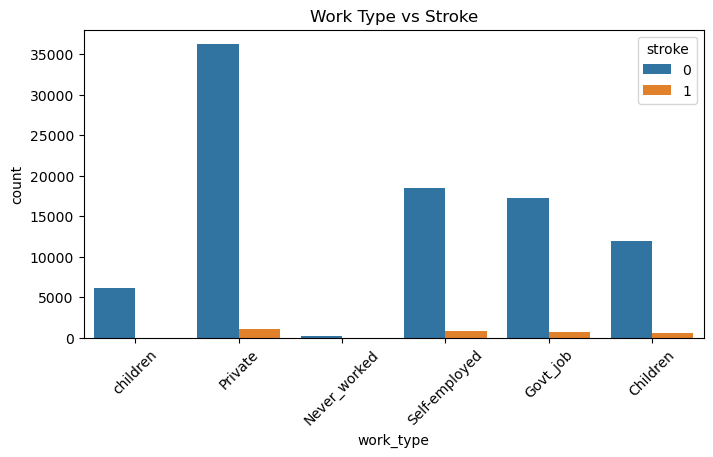

stroke,0,1
work_type,,
Children,0.953498,0.046502
Govt_job,0.960421,0.039579
Never_worked,1.000000,0.000000
Private,0.970922,0.029078
Self-employed,0.956924,0.043076
children,0.999675,0.000325


In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x="work_type", hue="stroke", data=df)
plt.xticks(rotation=45)
plt.title("Work Type vs Stroke")
plt.show()

pd.crosstab(df["work_type"], df["stroke"], normalize="index")

Feature Engineering

In [26]:
#Age
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 18, 35, 50, 65, 100],
    labels=["child", "young", "adult", "senior", "elder"]
)

In [27]:
#BMI Categories
df["bmi_category"] = pd.cut(
    df["bmi"],
    bins=[0, 18.5, 25, 30, 100],
    labels=["underweight", "normal", "overweight", "obese"]
)

In [28]:
#Glucose Risk Flag
df["high_glucose"] = (df["avg_glucose_level"] > 125).astype(int)

In [29]:
#Combined Risk Feature
df["cardio_risk"] = (
    df["hypertension"] + df["heart_disease"]
)

In [30]:
#Interaction Feature
df["age_glucose"] = df["age"] * df["avg_glucose_level"]

In [31]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group', 'bmi_category', 'high_glucose',
       'cardio_risk', 'age_glucose'],
      dtype='object')

Encoding

In [32]:
df = pd.get_dummies(df, drop_first=True)

Split

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop("stroke", axis=1)
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Baseline Model (Logistic Regression)

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight="balanced",
    max_iter=1000
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[9567 8471]
 [ 178  464]]
              precision    recall  f1-score   support

           0       0.98      0.53      0.69     18038
           1       0.05      0.72      0.10       642

    accuracy                           0.54     18680
   macro avg       0.52      0.63      0.39     18680
weighted avg       0.95      0.54      0.67     18680



In [ ]:
#Target Distribution
df["stroke"].value_counts(normalize=True)

stroke
0    0.95146
1    0.04854
Name: proportion, dtype: float64

Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[18036     2]
 [  642     0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18038
           1       0.00      0.00      0.00       642

    accuracy                           0.97     18680
   macro avg       0.48      0.50      0.49     18680
weighted avg       0.93      0.97      0.95     18680



SMOTE

In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [82]:
print(y_train_smote.value_counts())

stroke
0    72152
1    72152
Name: count, dtype: int64


In [83]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf.fit(X_train_smote, y_train_smote)

y_pred_rf = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[17932   106]
 [  630    12]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18038
           1       0.10      0.02      0.03       642

    accuracy                           0.96     18680
   macro avg       0.53      0.51      0.51     18680
weighted avg       0.94      0.96      0.95     18680



Feature Importance

In [84]:
import pandas as pd

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns)
feat_imp.sort_values(ascending=False).head(10)

age_glucose                0.102445
bmi                        0.101022
age                        0.068448
avg_glucose_level          0.068004
work_type_Private          0.060388
bmi_category_obese         0.054199
gender_Male                0.051601
bmi_category_overweight    0.050248
work_type_Self-employed    0.048941
work_type_Govt_job         0.046272
dtype: float64

Probability Distribution

In [85]:
y_probs = rf.predict_proba(X_test)[:,1]

pd.Series(y_probs).describe()

count    18680.000000
mean         0.069487
std          0.091791
min          0.000000
25%          0.010000
50%          0.040000
75%          0.090000
max          0.970000
dtype: float64

In [86]:
y_probs = rf.predict_proba(X_test)[:,1]

threshold = 0.05
y_pred_new = (y_probs >= threshold).astype(int)

print(confusion_matrix(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))

[[9691 8347]
 [ 279  363]]
              precision    recall  f1-score   support

           0       0.97      0.54      0.69     18038
           1       0.04      0.57      0.08       642

    accuracy                           0.54     18680
   macro avg       0.51      0.55      0.38     18680
weighted avg       0.94      0.54      0.67     18680



In [87]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

XGBoost

In [88]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    n_estimators=800,
    max_depth=4,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    min_child_weight=3,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10483  7555]
 [  228   414]]
              precision    recall  f1-score   support

           0       0.98      0.58      0.73     18038
           1       0.05      0.64      0.10       642

    accuracy                           0.58     18680
   macro avg       0.52      0.61      0.41     18680
weighted avg       0.95      0.58      0.71     18680



In [89]:
y_probs = xgb.predict_proba(X_test)[:,1]

for t in [0.2, 0.3, 0.4, 0.5]:
    print(f"\nThreshold = {t}")
    y_pred_t = (y_probs >= t).astype(int)
    print(confusion_matrix(y_test, y_pred_t))
    print(classification_report(y_test, y_pred_t))


Threshold = 0.2
[[ 4125 13913]
 [   26   616]]
              precision    recall  f1-score   support

           0       0.99      0.23      0.37     18038
           1       0.04      0.96      0.08       642

    accuracy                           0.25     18680
   macro avg       0.52      0.59      0.23     18680
weighted avg       0.96      0.25      0.36     18680


Threshold = 0.3
[[ 5583 12455]
 [   55   587]]
              precision    recall  f1-score   support

           0       0.99      0.31      0.47     18038
           1       0.05      0.91      0.09       642

    accuracy                           0.33     18680
   macro avg       0.52      0.61      0.28     18680
weighted avg       0.96      0.33      0.46     18680


Threshold = 0.4
[[ 7376 10662]
 [  107   535]]
              precision    recall  f1-score   support

           0       0.99      0.41      0.58     18038
           1       0.05      0.83      0.09       642

    accuracy                          

In [90]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      stratify=y, random_state=42)

# SMOTE على Train فقط !!
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [91]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

ratio = len(y_train[y_train==0]) / len(y_train[y_train==1])

model = XGBClassifier(
    scale_pos_weight=ratio,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='aucpr',   # مهم للـ imbalanced
    random_state=42
)

model.fit(X_train_res, y_train_res,
          eval_set=[(X_test, y_test)],
          verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [92]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np

y_prob = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# F1 لكل threshold
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-8)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Precision: {precision[best_idx]:.2f} | Recall: {recall[best_idx]:.2f} | F1: {f1_scores[best_idx]:.2f}")

# Final prediction
y_pred = (y_prob >= best_threshold).astype(int)
print(classification_report(y_test, y_pred))

Best Threshold: 0.51
Precision: 0.04 | Recall: 0.77 | F1: 0.08
              precision    recall  f1-score   support

           0       0.98      0.41      0.58     18038
           1       0.04      0.77      0.08       642

    accuracy                           0.42     18680
   macro avg       0.51      0.59      0.33     18680
weighted avg       0.95      0.42      0.56     18680



In [93]:
from sklearn.metrics import roc_auc_score, average_precision_score

print(f"ROC-AUC:  {roc_auc_score(y_test, y_prob):.3f}")
print(f"PR-AUC:   {average_precision_score(y_test, y_prob):.3f}")
# PR-AUC هو الـ metric الأهم في حالتك

ROC-AUC:  0.606
PR-AUC:   0.045


In [94]:
# 1. شوف الـ features مفيش null كتير؟
print(df.isnull().sum())
print(df.isnull().mean() * 100)

# 2. شوف الـ features correlation مع stroke
print(df.corr()['stroke'].sort_values(ascending=False))

# 3. شوف توزيع الـ features في الـ stroke cases
print(df.groupby('stroke').mean())

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
high_glucose                      0
cardio_risk                       0
age_glucose                       0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
age_group_young                   0
age_group_adult                   0
age_group_senior                  0
age_group_elder                   0
bmi_category_normal               0
bmi_category_overweight           0
bmi_category_obese          

In [95]:
# features جديدة تعبر عن الـ risk بشكل أوضح
df['age_hypertension'] = df['age'] * df['hypertension']
df['age_heart'] = df['age'] * df['heart_disease']
df['glucose_hypertension'] = df['avg_glucose_level'] * df['hypertension']
df['triple_risk'] = df['hypertension'] & df['heart_disease'] & df['high_glucose']
df['age_risk_score'] = df['age'] * (df['hypertension'] + df['heart_disease'] + df['high_glucose'])

# شوف الـ correlation الجديدة
new_features = ['age_hypertension', 'age_heart', 'glucose_hypertension', 
                'triple_risk', 'age_risk_score']
print(df[new_features + ['stroke']].corr()['stroke'].sort_values(ascending=False))

stroke                  1.000000
age_risk_score          0.076310
age_heart               0.043169
age_hypertension        0.033763
glucose_hypertension    0.032616
triple_risk             0.020890
Name: stroke, dtype: float64


In [98]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report

# ── LightGBM ──
lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=28,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgbm.fit(X_train_res, y_train_res)
lgbm_probs = lgbm.predict_proba(X_test)[:, 1]

print("=== LightGBM ===")
print(f"ROC-AUC : {roc_auc_score(y_test, lgbm_probs):.3f}")
print(f"PR-AUC  : {average_precision_score(y_test, lgbm_probs):.3f}")

# ── CatBoost ──
cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    class_weights=[1, 28],
    random_state=42,
    verbose=0
)
cat.fit(X_train_res, y_train_res)
cat_probs = cat.predict_proba(X_test)[:, 1]

print("\n=== CatBoost ===")
print(f"ROC-AUC : {roc_auc_score(y_test, cat_probs):.3f}")
print(f"PR-AUC  : {average_precision_score(y_test, cat_probs):.3f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 36076, number of negative: 72152
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 108228, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
=== LightGBM ===
ROC-AUC : 0.598
PR-AUC  : 0.043

=== CatBoost ===
ROC-AUC : 0.599
PR-AUC  : 0.044
